In [17]:
!pip install imutils -q

In [18]:
OUTPUT_FOLDER = "extracted_letter_images"

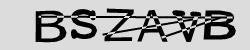

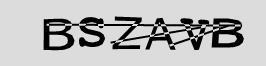

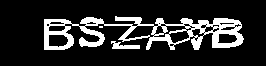

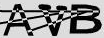

In [35]:
import cv2
from google.colab.patches import cv2_imshow
import os
import imutils

filename = os.path.basename("8514_bszavb.jpeg")
# filename = os.path.basename("2A2X.png")

captcha_correct_label = os.path.splitext(filename.split('_')[1])[0].lower()
#captcha_correct_label = os.path.splitext(filename)[0]

counts = {}

image = cv2.imread(filename)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_image = cv2.copyMakeBorder(gray_image, 8, 8, 8, 8, cv2.BORDER_REPLICATE)

thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = contours[1] if imutils.is_cv3() else contours[0]

letter_image_regions = []

for contour in contours:
  (x, y, w, h) = cv2.boundingRect(contour)

  if w / h > 1.25:
    half_width = int(w / 2)
    letter_image_regions.append((x, y, half_width, h))
    letter_image_regions.append((x + half_width, y, half_width, h))
  else:
    letter_image_regions.append((x, y, w, h))

letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

for letter_bounding_box, letter_text in zip(letter_image_regions, captcha_correct_label):
    x, y, w, h = letter_bounding_box

    letter_image = gray_image[y-2:y + h + 2, x-2: x + w + 2]
    save_path = os.path.join(OUTPUT_FOLDER, letter_text)

    if not os.path.exists(save_path):
      os.makedirs(save_path)

    count = counts.get(letter_text, 1)
    p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
    cv2.imwrite(p, letter_image)

    counts[letter_text] = count + 1

cv2_imshow(image)
cv2_imshow(gray_image)
cv2_imshow(thresh)
cv2_imshow(letter_image)

In [34]:
import shutil
shutil.rmtree(OUTPUT_FOLDER)